### Zeros of polynomials

We all know how solve $x^2 + x - 1 = 0$, for example.  If we consider $x^4 + x -3 = 0$, then it is no longer clear how to compute the roots.

In addition, we saw that evaluating the quadratic formula for the roots a quadratic polynomial can itself be problematic.  So, we develop methods that do not depend on any analytical structure, such as degree, of the polynomials

#### Definition

A __polynomial of degree (or order) $n$__ is given by

$$P(x) = a_n x^n + a_{n-1} x^{n-1} + \cdots + a_1 x + a_0.$$

The numbers $\{a_i\}_{i=0}^n$ are called the coefficients.

The following gives us a theoretical justification for searching for the roots of $P(x)$:

#### Theorem (Fundamental Theorem of Algebra)

A polynomial $P(x)$ with real or complex coefficients has $n$ (possibly repeated and possibly complex) roots.  Furthermore, for some (possibly complex) values $x_1,x_2,\ldots,x_k$, and integers $m_1,m_2,\ldots,m_k$

$$P(x) = a_n (x-x_1)^{m_1} (x-x_2)^{m_2} \cdots (x-x_k)^{m_k}, \quad \sum_{j=1}^k m_k = n.$$

#### Corollary

Suppose $P(x)$ and $Q(x)$ are polynomials of degree $n$.  If there are $n+1$ distict points $x_1,x_2,\ldots,x_{n+1}$ (on the real axis or in the complex plane) such that $P(x_i) = Q(x_i)$, then $P(x) = Q(x)$ for all $x$.

### Horner's Method (Newton's method with nesting)

#### Theorem

Let

$$P(x) = a_n x^n + a_{n-1} x^{n-1} + \cdots + a_1 x + a_0.$$

Define $b_n = a_n$ and

$$ b_k = a_k + b_{k+1}x_0, \quad \text{for } k = n-1, n-2,\ldots,1,0.$$

Then $b_0 = P(x_0)$.  Moreover, if

$$ Q(x) = b_n x^{n-1} + b_{n-1} x^{n-2} + \cdots + b_2 x + b_1,$$

then

$$ P(x) = (x-x_0) Q(x) + b_0.$$

#### Proof

If we can prove the last claim then $P(x_0) = b_0$.  So, consider

$$ (x-x_0) Q(x) + b_0\\
= x Q(x) - x_0 Q(x) + b_0\\
= b_n x^{n} + b_{n-1} x^{n-1} + \cdots + b_2 x^2 + b_1 x\\
- b_n x_0 x^{n-1} - b_{n-1} x_0 x^{n-2} - \cdots - b_2 x_0 x - b_1 x_0 + b_0$$

Collecting the powers, we find

* $b_n x^n = a_n x^n$ (by definition)
* $(b_{n-1} - b_n x_0) x^{n-1} = a_{n-1} x^{n-1}$
* $(b_{n-2} - b_{n-1} x_0) x^{n-2} = a_{n-1} x^{n-2}$
* $\vdots$
* $ b_0 - b_1 x_0 = a_0$

This gives an iterative method for computing $P(x_0)$.   Now, to compute $P'(x_0)$:

$$ P'(x) = Q(x) + (x-x_0)Q'(x) \quad\Rightarrow\quad P'(x_0) = Q(x_0).$$

So, as we apply Horner's method to compute $P(x_0)$, we also compute $\{b_i\}$ the coefficients of $Q(x)$.  So, we can apply Horner's method again to evaluate $Q(x_0)$.

#### The evaulation of $P(x_0)$ and $P'(x_0)$

Set $b_n = a_n$, $c_n = b_n$.

For $k = n-1, n-2, \ldots, 1$ set
* $b_k = a_k + b_{k+1}x_0$
* $c_k = b_k + c_{k+1}x_0$

Set $b_0 = a_0 + b_{1}x_0$



Then $b_0 = P(x_0)$ and $c_1 = Q(x_0) = P'(x_0)$.



In [1]:
a = [-1,1,-1,1,-1,1,1]; pow = [1:length(a)]-1;
b = a;  c = a; % initialize b & c, just good programming practice
p = @(x) sum((x.^pow).*a); 
dp = @(x) sum((x.^(pow(2:end)-1)).*a(2:end).*pow(2:end));

x0 = .5;
i = length(a);
while i > 2
    i = i-1;
    b(i) = a(i) + b(i+1)*x0;
    c(i) = b(i) + c(i+1)*x0;
end
b(1) = a(1) + b(2)*x0;
c(2)-dp(x0)
b(1)-p(x0)

ans =

     0


ans =

     0


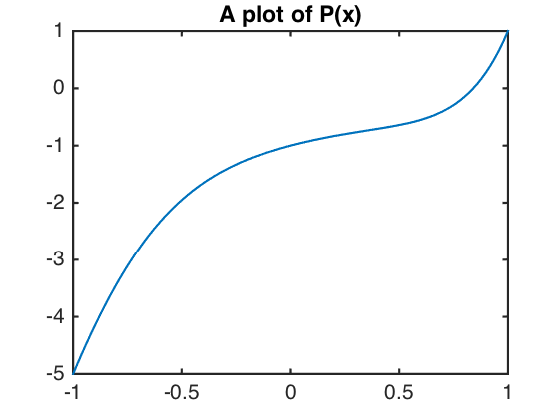

In [95]:
x = linspace(-1,1,100); y = x;
for i = 1:100
    y(i)=p(x(i));
end
hold off; plot(x,y)
title('A plot of P(x)')

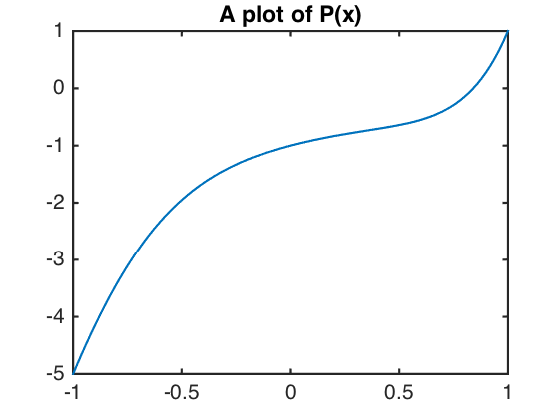

p0 =

    0.8403


In [98]:
p0 = .1;
for j = 1:20;
    i = length(a);
    while i > 1
        i = i-1;
        b(i) = a(i) + b(i+1)*p0;
        c(i) = b(i) + c(i+1)*p0;
    end
    p0 = p0 - b(1)/c(2);
end
p0

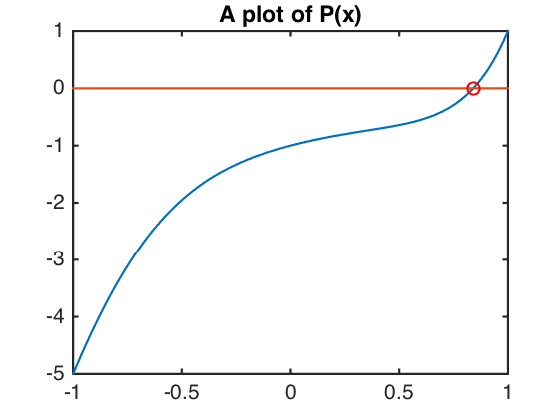

In [103]:
plot(x,y); hold on;
title('A plot of P(x)')
plot(x,0*x) % plot the x-axis
plot(p0,0,'ro') % plot the zero to see that we are computing it

#### Example

Horner's method actually amounts to synthetic division.  Compute $P(2)$ where

$$P(x) = x^4 -2 x^3 +x^2 -x + 2$$

using Horner's method.